In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
from matplotlib import image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
import pathlib

In [3]:
dir = '/kaggle/input/tea-leaf-disease-dataset/TeaLeafDisease'
labels = os.listdir(dir)
labels

['white spot',
 'Anthracnose',
 'healthy',
 'bird eye spot',
 'brown blight',
 'red leaf spot',
 'gray light',
 'algal leaf']

In [21]:
train_batch = 32
val_batch = 32
img_height = 224
img_width = 224
IMG_SIZE = (img_height, img_width)
val_split = 0.2

In [22]:
labels = os.listdir(dir)
labels

['white spot',
 'Anthracnose',
 'healthy',
 'bird eye spot',
 'brown blight',
 'red leaf spot',
 'gray light',
 'algal leaf']

In [23]:
for label in labels:
    print(label, len(os.listdir(dir+'/'+label)))

white spot 142
Anthracnose 100
healthy 74
bird eye spot 100
brown blight 113
red leaf spot 143
gray light 100
algal leaf 113


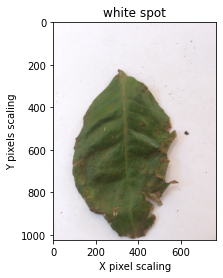

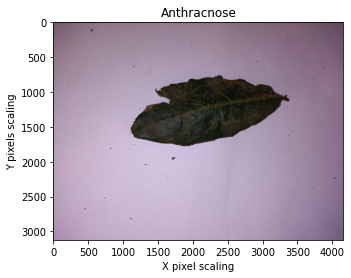

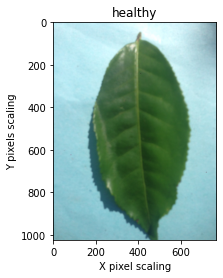

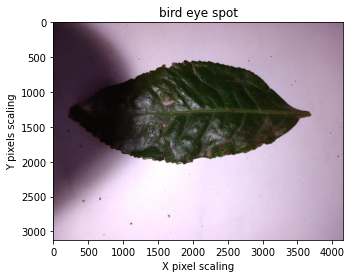

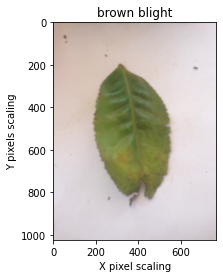

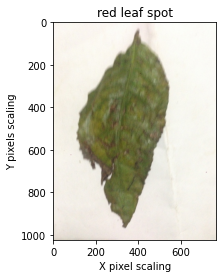

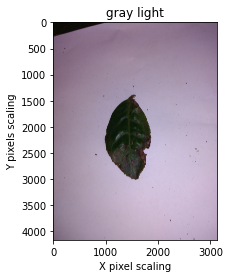

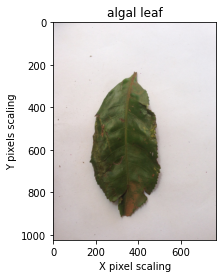

In [24]:
for label in labels:
    path = os.listdir(dir + '/' + label)
    img = dir + '/' + label + '/' + path[1]
    plt.title(label)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    image = mpimg.imread(img)
    plt.imshow(image)
    plt.show()

In [25]:
train = tf.keras.utils.image_dataset_from_directory(dir,
                                                       validation_split=val_split,
                                                       subset="training",
                                                       seed=123,
                                                       image_size=(img_height, img_width),
                                                       batch_size=train_batch
                                                      )

Found 885 files belonging to 8 classes.
Using 708 files for training.


In [26]:
val = tf.keras.utils.image_dataset_from_directory(dir,                                                            
                                                     validation_split=val_split,                                                            
                                                     subset="validation",                                                     
                                                     seed=123,                                                     
                                                     image_size=(img_height, img_width),                                                     
                                                     batch_size=val_batch                                                           
                                                    )

Found 885 files belonging to 8 classes.
Using 177 files for validation.


In [27]:
class_names = train.class_names
print(class_names)

num_classes=len(class_names)

['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


In [29]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

In [30]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomFlip("vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

In [31]:
TeaCNN = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(1024, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='softmax'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(num_classes)
])

In [32]:
base_learning_rate = 0.0005
TeaCNN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
TeaCNN.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 112, 112, 16)      64        
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 56, 56, 32)       

In [35]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = TeaCNN.fit(train,
                    validation_data=val,
                    epochs=100, 
                    #callbacks=[callback]
                    )

Epoch 1/100
23/23 [==============================] - 1s 34ms/step - loss: 0.2225 - accuracy: 0.9209 - val_loss: 0.5515 - val_accuracy: 0.8079
Epoch 2/100
23/23 [==============================] - 1s 33ms/step - loss: 0.2376 - accuracy: 0.9110 - val_loss: 0.7924 - val_accuracy: 0.7853
Epoch 3/100
23/23 [==============================] - 1s 34ms/step - loss: 0.2225 - accuracy: 0.9237 - val_loss: 6.2746 - val_accuracy: 0.2090
Epoch 4/100
23/23 [==============================] - 1s 34ms/step - loss: 0.2071 - accuracy: 0.9308 - val_loss: 2.6196 - val_accuracy: 0.5254
Epoch 5/100
23/23 [==============================] - 1s 33ms/step - loss: 0.1878 - accuracy: 0.9379 - val_loss: 0.8477 - val_accuracy: 0.7740
Epoch 6/100
23/23 [==============================] - 1s 37ms/step - loss: 0.1892 - accuracy: 0.9336 - val_loss: 1.7806 - val_accuracy: 0.6102
Epoch 7/100
23/23 [==============================] - 1s 34ms/step - loss: 0.1951 - accuracy: 0.9421 - val_loss: 1.5299 - val_accuracy: 0.6780
Epoch 

In [36]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


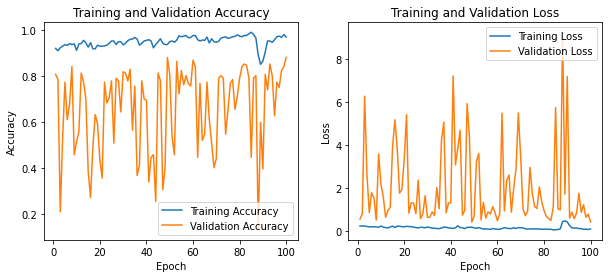

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [39]:
score = TeaCNN.evaluate(val)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

6/6 [==============================] - 0s 11ms/step - loss: 0.4152 - accuracy: 0.8814
Test loss: 0.4152021110057831
Test accuracy: 0.8813559412956238


In [40]:
score = TeaCNN.evaluate(train)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

23/23 [==============================] - 0s 11ms/step - loss: 0.1812 - accuracy: 0.9463
Test loss: 0.1811627596616745
Test accuracy: 0.9463276863098145


In [73]:
from matplotlib import pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

TeaCNN.save("TeaCNN.h5")
print("Saved model to disk")

print("Model Loaded Successfully")

Saved model to disk
Model Loaded Successfully


In [74]:
import imageio as io

In [75]:
def predict(test_img_path):
    test_image = load_img(test_img_path, target_size = (180,180)) # load image 

    test_image = img_to_array(test_image)#/255 # convert image to np array and normalize
    test_image = np.expand_dims(test_image, axis = 0)# change dimention 3D to 4D

    result = TeaCNN.predict(test_image) # predict diseased palnt or not
    #print(result) 

    pred = np.argmax(result, axis=1)
    pred = pred[0]

    expression = ['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot','white spot']

    test_image = io.v2.imread(test_img_path)
    print(expression[pred])
    plt.imshow(test_image)

red leaf spot


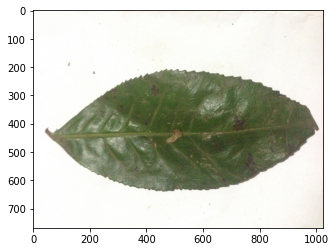

In [76]:
predict("/kaggle/input/tea-leaf-disease-dataset/TeaLeafDisease/red leaf spot/UNADJUSTEDNONRAW_thumb_177.jpg")

healthy


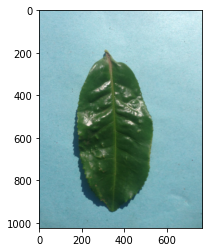

In [77]:
predict("/kaggle/input/tea-leaf-disease-dataset/TeaLeafDisease/healthy/UNADJUSTEDNONRAW_thumb_209.jpg")